In [1]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
from image_recur import _image_recur
import matplotlib
import numpy as np
import cv2
plt.rcParams['image.cmap'] = 'gist_earth'
np.random.seed(98765)

In [2]:
# import unet module
from tf_unet import image_gen
from tf_unet import unet
from img_provider import simple_data_provider, simple_padding_data_provider
from tf_unet import util

In [3]:
generator_artificial = image_gen.GrayScaleDataProvider(572, 572, cnt=20, rectangles=True)
generator_reallife = simple_data_provider(x=572, y=572, nclass=3, channel='red', test=False)
generator_test_reallife = simple_padding_data_provider(x=572, y=572, nclass=3, channel='red', test=True, pad_size=88)

(1, 572, 572, 1) (1, 572, 572, 3)


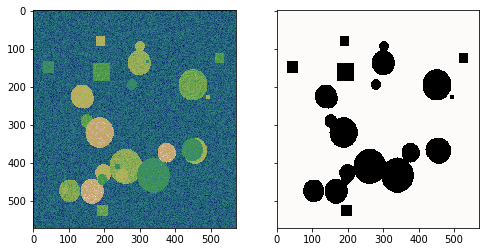

In [4]:
# test artificial generator
x_test, y_test = generator_artificial(1)
print(x_test.shape, y_test.shape)
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(x_test[0,:, :,0], aspect="auto")
ax[1].imshow(y_test[0,:, :,0], aspect="auto")

In [12]:
net = unet.Unet(channels=generator_reallife.channels,
                n_class=generator_reallife.n_class,
                layers=4,
                features_root=16)

2019-01-17 11:25:03,491 Layers 4, features 16, filter size 3x3, pool size: 2x2


In [13]:
trainer = unet.Trainer(net, optimizer="momentum", 
                       opt_kwargs=dict(momentum=0.2))

In [14]:
# pre-training
path_artificial = trainer.train(generator_artificial, "./unet_trained", 
                     training_iters=32, epochs=10, display_step=2)

2019-01-17 11:25:07,475 Removing 'D:\ChangLiu\MasterThesis\Master-Thesis\prediction'
2019-01-17 11:25:07,475 Removing 'D:\ChangLiu\MasterThesis\Master-Thesis\unet_trained'
2019-01-17 11:25:07,475 Allocating 'D:\ChangLiu\MasterThesis\Master-Thesis\prediction'
2019-01-17 11:25:07,475 Allocating 'D:\ChangLiu\MasterThesis\Master-Thesis\unet_trained'
2019-01-17 11:25:12,736 Verification error= 58.4%, loss= 1.0978
2019-01-17 11:25:15,987 Start optimization
2019-01-17 11:25:22,908 Iter 0, Minibatch Loss= 1.0193, Training Accuracy= 0.7515, Minibatch error= 24.8%
2019-01-17 11:25:23,926 Iter 2, Minibatch Loss= 0.9025, Training Accuracy= 0.7402, Minibatch error= 26.0%
2019-01-17 11:25:24,912 Iter 4, Minibatch Loss= 0.7067, Training Accuracy= 0.7928, Minibatch error= 20.7%
2019-01-17 11:25:25,932 Iter 6, Minibatch Loss= 0.7370, Training Accuracy= 0.7587, Minibatch error= 24.1%
2019-01-17 11:25:26,966 Iter 8, Minibatch Loss= 0.6344, Training Accuracy= 0.8043, Minibatch error= 19.6%
2019-01-17 11:2

2019-01-17 11:26:44,489 Iter 136, Minibatch Loss= 0.0784, Training Accuracy= 0.9821, Minibatch error= 1.8%
2019-01-17 11:26:45,540 Iter 138, Minibatch Loss= 0.3175, Training Accuracy= 0.9317, Minibatch error= 6.8%
2019-01-17 11:26:46,510 Iter 140, Minibatch Loss= 8.7131, Training Accuracy= 0.7905, Minibatch error= 21.0%
2019-01-17 11:26:47,517 Iter 142, Minibatch Loss= 0.9284, Training Accuracy= 0.1687, Minibatch error= 83.1%
2019-01-17 11:26:48,514 Iter 144, Minibatch Loss= 0.8380, Training Accuracy= 0.7811, Minibatch error= 21.9%
2019-01-17 11:26:49,546 Iter 146, Minibatch Loss= 0.7691, Training Accuracy= 0.7812, Minibatch error= 21.9%
2019-01-17 11:26:50,551 Iter 148, Minibatch Loss= 0.7051, Training Accuracy= 0.7877, Minibatch error= 21.2%
2019-01-17 11:26:51,553 Iter 150, Minibatch Loss= 0.6893, Training Accuracy= 0.7383, Minibatch error= 26.2%
2019-01-17 11:26:52,540 Iter 152, Minibatch Loss= 0.7190, Training Accuracy= 0.7663, Minibatch error= 23.4%
2019-01-17 11:26:53,511 Iter 1

2019-01-17 11:28:06,511 Iter 278, Minibatch Loss= 0.5678, Training Accuracy= 0.8402, Minibatch error= 16.0%
2019-01-17 11:28:07,495 Iter 280, Minibatch Loss= 0.5845, Training Accuracy= 0.8097, Minibatch error= 19.0%
2019-01-17 11:28:08,435 Iter 282, Minibatch Loss= 0.6337, Training Accuracy= 0.7816, Minibatch error= 21.8%
2019-01-17 11:28:09,406 Iter 284, Minibatch Loss= 0.6292, Training Accuracy= 0.7768, Minibatch error= 22.3%
2019-01-17 11:28:10,346 Iter 286, Minibatch Loss= 0.5905, Training Accuracy= 0.8073, Minibatch error= 19.3%
2019-01-17 11:28:10,724 Epoch 8, Average loss: 0.7884, learning rate: 0.1327
2019-01-17 11:28:11,386 Verification error= 20.3%, loss= 0.6159
2019-01-17 11:28:14,502 Iter 288, Minibatch Loss= 0.6546, Training Accuracy= 0.7567, Minibatch error= 24.3%
2019-01-17 11:28:15,457 Iter 290, Minibatch Loss= 0.6352, Training Accuracy= 0.7822, Minibatch error= 21.8%
2019-01-17 11:28:16,396 Iter 292, Minibatch Loss= 0.6039, Training Accuracy= 0.8024, Minibatch error= 1

In [4]:
# normal training using normal configuration
net_real = unet.Unet(channels=generator_reallife.channels,
                     n_class=generator_reallife.n_class,
                     layers=4,
                     features_root=16)

2019-01-17 13:56:50,826 Layers 4, features 16, filter size 3x3, pool size: 2x2


In [ ]:
trainer_real = unet.Trainer(net_real, optimizer="momentum", 
                       opt_kwargs=dict(momentum=0.2))
# train with reallife images
path_real = trainer_real.train(generator_reallife, "./unet_trained",
                          training_iters=32, epochs=200, display_step=8, restore=True)


2019-01-16 10:03:34,296 Layers 4, features 16, filter size 3x3, pool size: 2x2


In [5]:
'''Training with weighted loss'''
net_real_weighted = unet.Unet(channels=generator_reallife.channels,
                              n_class=generator_reallife.n_class,
                              layers=4,
                              features_root=16,
                              cost_kwargs=dict(
                                  class_weights=[0.32, 0.46, 0.22]
                              ))


2019-01-21 11:10:50,216 Layers 4, features 16, filter size 3x3, pool size: 2x2


In [6]:
trainer_real_weighted = unet.Trainer(net_real_weighted, optimizer="momentum", 
                       opt_kwargs=dict(momentum=0.2))
# train with reallife images
path_real_weighted = trainer_real_weighted.train(generator_reallife, "./unet_trained",
                          training_iters=32, epochs=200, display_step=8, restore=True)

INFO:tensorflow:Restoring parameters from ./unet_trained\model.ckpt


2019-01-18 14:28:16,081 Restoring parameters from ./unet_trained\model.ckpt
2019-01-18 14:28:16,162 Model restored from file: ./unet_trained\model.ckpt
2019-01-18 14:28:22,338 Verification error= 19.0%, loss= 0.1658
2019-01-18 14:28:26,041 Start optimization
2019-01-18 14:28:33,264 Iter 0, Minibatch Loss= 0.1630, Training Accuracy= 0.8229, Minibatch error= 17.7%
2019-01-18 14:28:37,761 Iter 8, Minibatch Loss= 0.2068, Training Accuracy= 0.8017, Minibatch error= 19.8%
2019-01-18 14:28:42,289 Iter 16, Minibatch Loss= 0.1683, Training Accuracy= 0.8067, Minibatch error= 19.3%
2019-01-18 14:28:46,771 Iter 24, Minibatch Loss= 0.1886, Training Accuracy= 0.8000, Minibatch error= 20.0%
2019-01-18 14:28:50,467 Epoch 0, Average loss: 0.1828, learning rate: 0.0000
2019-01-18 14:28:51,148 Verification error= 19.0%, loss= 0.1658
2019-01-18 14:28:54,381 Iter 32, Minibatch Loss= 0.1843, Training Accuracy= 0.7898, Minibatch error= 21.0%
2019-01-18 14:28:58,882 Iter 40, Minibatch Loss= 0.2202, Training A

2019-01-18 14:33:32,738 Verification error= 19.0%, loss= 0.1657
2019-01-18 14:33:36,809 Iter 448, Minibatch Loss= 0.1407, Training Accuracy= 0.8734, Minibatch error= 12.7%
2019-01-18 14:33:41,265 Iter 456, Minibatch Loss= 0.2151, Training Accuracy= 0.6760, Minibatch error= 32.4%
2019-01-18 14:33:45,765 Iter 464, Minibatch Loss= 0.1490, Training Accuracy= 0.8342, Minibatch error= 16.6%
2019-01-18 14:33:50,308 Iter 472, Minibatch Loss= 0.2018, Training Accuracy= 0.7655, Minibatch error= 23.4%
2019-01-18 14:33:53,984 Epoch 14, Average loss: 0.1869, learning rate: 0.0000
2019-01-18 14:33:54,664 Verification error= 19.0%, loss= 0.1657
2019-01-18 14:33:58,921 Iter 480, Minibatch Loss= 0.1711, Training Accuracy= 0.8258, Minibatch error= 17.4%
2019-01-18 14:34:03,439 Iter 488, Minibatch Loss= 0.1903, Training Accuracy= 0.8012, Minibatch error= 19.9%
2019-01-18 14:34:07,974 Iter 496, Minibatch Loss= 0.2045, Training Accuracy= 0.7273, Minibatch error= 27.3%
2019-01-18 14:34:12,492 Iter 504, Mini

2019-01-18 14:38:56,091 Iter 904, Minibatch Loss= 0.1372, Training Accuracy= 0.8533, Minibatch error= 14.7%
2019-01-18 14:39:00,566 Iter 912, Minibatch Loss= 0.1845, Training Accuracy= 0.7941, Minibatch error= 20.6%
2019-01-18 14:39:05,044 Iter 920, Minibatch Loss= 0.1952, Training Accuracy= 0.7469, Minibatch error= 25.3%
2019-01-18 14:39:08,712 Epoch 28, Average loss: 0.1799, learning rate: 0.0000
2019-01-18 14:39:09,390 Verification error= 19.0%, loss= 0.1657
2019-01-18 14:39:14,564 Iter 928, Minibatch Loss= 0.2194, Training Accuracy= 0.7078, Minibatch error= 29.2%
2019-01-18 14:39:19,083 Iter 936, Minibatch Loss= 0.1672, Training Accuracy= 0.8223, Minibatch error= 17.8%
2019-01-18 14:39:23,570 Iter 944, Minibatch Loss= 0.1298, Training Accuracy= 0.8396, Minibatch error= 16.0%
2019-01-18 14:39:28,012 Iter 952, Minibatch Loss= 0.1908, Training Accuracy= 0.7822, Minibatch error= 21.8%
2019-01-18 14:39:31,671 Epoch 29, Average loss: 0.1827, learning rate: 0.0000
2019-01-18 14:39:32,351 

2019-01-18 14:44:34,336 Iter 1368, Minibatch Loss= 0.1645, Training Accuracy= 0.8210, Minibatch error= 17.9%
2019-01-18 14:44:38,066 Epoch 42, Average loss: 0.1781, learning rate: 0.0000
2019-01-18 14:44:38,747 Verification error= 19.0%, loss= 0.1657
2019-01-18 14:44:45,274 Iter 1376, Minibatch Loss= 0.1919, Training Accuracy= 0.7996, Minibatch error= 20.0%
2019-01-18 14:44:49,738 Iter 1384, Minibatch Loss= 0.1714, Training Accuracy= 0.8173, Minibatch error= 18.3%
2019-01-18 14:44:54,227 Iter 1392, Minibatch Loss= 0.1615, Training Accuracy= 0.7907, Minibatch error= 20.9%
2019-01-18 14:44:58,712 Iter 1400, Minibatch Loss= 0.1440, Training Accuracy= 0.8392, Minibatch error= 16.1%
2019-01-18 14:45:02,394 Epoch 43, Average loss: 0.1792, learning rate: 0.0000
2019-01-18 14:45:03,074 Verification error= 19.0%, loss= 0.1657
2019-01-18 14:45:09,542 Iter 1408, Minibatch Loss= 0.1861, Training Accuracy= 0.7881, Minibatch error= 21.2%
2019-01-18 14:45:14,079 Iter 1416, Minibatch Loss= 0.1748, Tra

2019-01-18 14:50:24,263 Epoch 56, Average loss: 0.1779, learning rate: 0.0000
2019-01-18 14:50:24,941 Verification error= 19.0%, loss= 0.1657
2019-01-18 14:50:32,186 Iter 1824, Minibatch Loss= 0.1651, Training Accuracy= 0.8267, Minibatch error= 17.3%
2019-01-18 14:50:36,712 Iter 1832, Minibatch Loss= 0.1730, Training Accuracy= 0.8163, Minibatch error= 18.4%
2019-01-18 14:50:41,173 Iter 1840, Minibatch Loss= 0.1867, Training Accuracy= 0.7276, Minibatch error= 27.2%
2019-01-18 14:50:45,611 Iter 1848, Minibatch Loss= 0.1639, Training Accuracy= 0.7915, Minibatch error= 20.9%
2019-01-18 14:50:49,267 Epoch 57, Average loss: 0.1815, learning rate: 0.0000
2019-01-18 14:50:49,946 Verification error= 19.0%, loss= 0.1657
2019-01-18 14:50:57,269 Iter 1856, Minibatch Loss= 0.1907, Training Accuracy= 0.7823, Minibatch error= 21.8%
2019-01-18 14:51:01,721 Iter 1864, Minibatch Loss= 0.1542, Training Accuracy= 0.8125, Minibatch error= 18.8%
2019-01-18 14:51:06,244 Iter 1872, Minibatch Loss= 0.1456, Tra

2019-01-18 14:56:32,220 Iter 2272, Minibatch Loss= 0.1747, Training Accuracy= 0.8095, Minibatch error= 19.0%
2019-01-18 14:56:36,665 Iter 2280, Minibatch Loss= 0.1431, Training Accuracy= 0.8404, Minibatch error= 16.0%
2019-01-18 14:56:41,139 Iter 2288, Minibatch Loss= 0.2079, Training Accuracy= 0.7055, Minibatch error= 29.4%
2019-01-18 14:56:45,610 Iter 2296, Minibatch Loss= 0.1433, Training Accuracy= 0.8612, Minibatch error= 13.9%
2019-01-18 14:56:49,248 Epoch 71, Average loss: 0.1864, learning rate: 0.0000
2019-01-18 14:56:49,921 Verification error= 19.0%, loss= 0.1657
2019-01-18 14:56:58,421 Iter 2304, Minibatch Loss= 0.1748, Training Accuracy= 0.8218, Minibatch error= 17.8%
2019-01-18 14:57:02,811 Iter 2312, Minibatch Loss= 0.2194, Training Accuracy= 0.7078, Minibatch error= 29.2%
2019-01-18 14:57:07,272 Iter 2320, Minibatch Loss= 0.2114, Training Accuracy= 0.7703, Minibatch error= 23.0%
2019-01-18 14:57:11,727 Iter 2328, Minibatch Loss= 0.1900, Training Accuracy= 0.7872, Minibatch

2019-01-18 15:02:48,639 Iter 2728, Minibatch Loss= 0.1909, Training Accuracy= 0.7887, Minibatch error= 21.1%
2019-01-18 15:02:53,083 Iter 2736, Minibatch Loss= 0.1667, Training Accuracy= 0.8268, Minibatch error= 17.3%
2019-01-18 15:02:57,567 Iter 2744, Minibatch Loss= 0.1531, Training Accuracy= 0.8272, Minibatch error= 17.3%
2019-01-18 15:03:01,197 Epoch 85, Average loss: 0.1789, learning rate: 0.0000
2019-01-18 15:03:01,871 Verification error= 19.0%, loss= 0.1657
2019-01-18 15:03:11,160 Iter 2752, Minibatch Loss= 0.1664, Training Accuracy= 0.8247, Minibatch error= 17.5%
2019-01-18 15:03:15,619 Iter 2760, Minibatch Loss= 0.1940, Training Accuracy= 0.7483, Minibatch error= 25.2%
2019-01-18 15:03:20,102 Iter 2768, Minibatch Loss= 0.1804, Training Accuracy= 0.8020, Minibatch error= 19.8%
2019-01-18 15:03:24,565 Iter 2776, Minibatch Loss= 0.2109, Training Accuracy= 0.7812, Minibatch error= 21.9%
2019-01-18 15:03:28,512 Epoch 86, Average loss: 0.1916, learning rate: 0.0000
2019-01-18 15:03:

2019-01-18 15:09:33,184 Iter 3184, Minibatch Loss= 0.1719, Training Accuracy= 0.8047, Minibatch error= 19.5%
2019-01-18 15:09:37,669 Iter 3192, Minibatch Loss= 0.1752, Training Accuracy= 0.8044, Minibatch error= 19.6%
2019-01-18 15:09:41,312 Epoch 99, Average loss: 0.1760, learning rate: 0.0000
2019-01-18 15:09:41,991 Verification error= 19.0%, loss= 0.1657
2019-01-18 15:09:52,261 Iter 3200, Minibatch Loss= 0.1731, Training Accuracy= 0.7818, Minibatch error= 21.8%
2019-01-18 15:09:56,753 Iter 3208, Minibatch Loss= 0.1512, Training Accuracy= 0.8364, Minibatch error= 16.4%
2019-01-18 15:10:01,209 Iter 3216, Minibatch Loss= 0.1863, Training Accuracy= 0.7914, Minibatch error= 20.9%
2019-01-18 15:10:05,647 Iter 3224, Minibatch Loss= 0.1510, Training Accuracy= 0.8151, Minibatch error= 18.5%
2019-01-18 15:10:09,300 Epoch 100, Average loss: 0.1852, learning rate: 0.0000
2019-01-18 15:10:09,981 Verification error= 19.0%, loss= 0.1657
2019-01-18 15:10:20,447 Iter 3232, Minibatch Loss= 0.1345, Tr

2019-01-18 15:16:20,351 Iter 3640, Minibatch Loss= 0.1714, Training Accuracy= 0.7768, Minibatch error= 22.3%
2019-01-18 15:16:24,017 Epoch 113, Average loss: 0.1872, learning rate: 0.0000
2019-01-18 15:16:24,712 Verification error= 19.0%, loss= 0.1657
2019-01-18 15:16:36,165 Iter 3648, Minibatch Loss= 0.1821, Training Accuracy= 0.7944, Minibatch error= 20.6%
2019-01-18 15:16:40,766 Iter 3656, Minibatch Loss= 0.1663, Training Accuracy= 0.7945, Minibatch error= 20.6%
2019-01-18 15:16:45,531 Iter 3664, Minibatch Loss= 0.1760, Training Accuracy= 0.7797, Minibatch error= 22.0%
2019-01-18 15:16:50,079 Iter 3672, Minibatch Loss= 0.1762, Training Accuracy= 0.7989, Minibatch error= 20.1%
2019-01-18 15:16:53,734 Epoch 114, Average loss: 0.1829, learning rate: 0.0000
2019-01-18 15:16:54,413 Verification error= 19.0%, loss= 0.1657
2019-01-18 15:17:05,863 Iter 3680, Minibatch Loss= 0.1491, Training Accuracy= 0.8400, Minibatch error= 16.0%
2019-01-18 15:17:10,520 Iter 3688, Minibatch Loss= 0.1775, T

2019-01-18 15:23:24,918 Epoch 127, Average loss: 0.1848, learning rate: 0.0000
2019-01-18 15:23:25,600 Verification error= 19.0%, loss= 0.1657
2019-01-18 15:23:37,829 Iter 4096, Minibatch Loss= 0.1762, Training Accuracy= 0.8017, Minibatch error= 19.8%
2019-01-18 15:23:42,310 Iter 4104, Minibatch Loss= 0.1388, Training Accuracy= 0.8287, Minibatch error= 17.1%
2019-01-18 15:23:46,798 Iter 4112, Minibatch Loss= 0.1508, Training Accuracy= 0.8388, Minibatch error= 16.1%
2019-01-18 15:23:51,257 Iter 4120, Minibatch Loss= 0.1780, Training Accuracy= 0.7743, Minibatch error= 22.6%
2019-01-18 15:23:54,932 Epoch 128, Average loss: 0.1885, learning rate: 0.0000
2019-01-18 15:23:55,621 Verification error= 19.0%, loss= 0.1657
2019-01-18 15:24:08,782 Iter 4128, Minibatch Loss= 0.1823, Training Accuracy= 0.8095, Minibatch error= 19.0%
2019-01-18 15:24:13,229 Iter 4136, Minibatch Loss= 0.1703, Training Accuracy= 0.8214, Minibatch error= 17.9%
2019-01-18 15:24:17,721 Iter 4144, Minibatch Loss= 0.2375, T

2019-01-18 15:31:04,937 Iter 4544, Minibatch Loss= 0.1732, Training Accuracy= 0.8092, Minibatch error= 19.1%
2019-01-18 15:31:09,532 Iter 4552, Minibatch Loss= 0.2065, Training Accuracy= 0.7365, Minibatch error= 26.4%
2019-01-18 15:31:14,074 Iter 4560, Minibatch Loss= 0.1564, Training Accuracy= 0.8437, Minibatch error= 15.6%
2019-01-18 15:31:18,654 Iter 4568, Minibatch Loss= 0.1638, Training Accuracy= 0.8146, Minibatch error= 18.5%
2019-01-18 15:31:22,459 Epoch 142, Average loss: 0.1891, learning rate: 0.0000
2019-01-18 15:31:23,139 Verification error= 19.0%, loss= 0.1657
2019-01-18 15:31:37,463 Iter 4576, Minibatch Loss= 0.1568, Training Accuracy= 0.8261, Minibatch error= 17.4%
2019-01-18 15:31:42,029 Iter 4584, Minibatch Loss= 0.1832, Training Accuracy= 0.8019, Minibatch error= 19.8%
2019-01-18 15:31:46,526 Iter 4592, Minibatch Loss= 0.1721, Training Accuracy= 0.8159, Minibatch error= 18.4%
2019-01-18 15:31:51,082 Iter 4600, Minibatch Loss= 0.1790, Training Accuracy= 0.8206, Minibatc

2019-01-18 15:38:43,968 Iter 5000, Minibatch Loss= 0.1871, Training Accuracy= 0.7565, Minibatch error= 24.3%
2019-01-18 15:38:48,453 Iter 5008, Minibatch Loss= 0.1664, Training Accuracy= 0.8112, Minibatch error= 18.9%
2019-01-18 15:38:52,933 Iter 5016, Minibatch Loss= 0.1928, Training Accuracy= 0.7498, Minibatch error= 25.0%
2019-01-18 15:38:56,602 Epoch 156, Average loss: 0.1919, learning rate: 0.0000
2019-01-18 15:38:57,285 Verification error= 19.0%, loss= 0.1657
2019-01-18 15:39:11,859 Iter 5024, Minibatch Loss= 0.1459, Training Accuracy= 0.8162, Minibatch error= 18.4%
2019-01-18 15:39:16,395 Iter 5032, Minibatch Loss= 0.1396, Training Accuracy= 0.8466, Minibatch error= 15.3%
2019-01-18 15:39:20,874 Iter 5040, Minibatch Loss= 0.1847, Training Accuracy= 0.8117, Minibatch error= 18.8%
2019-01-18 15:39:25,390 Iter 5048, Minibatch Loss= 0.1962, Training Accuracy= 0.7960, Minibatch error= 20.4%
2019-01-18 15:39:29,131 Epoch 157, Average loss: 0.1774, learning rate: 0.0000
2019-01-18 15:3

2019-01-18 15:46:53,063 Iter 5456, Minibatch Loss= 0.1379, Training Accuracy= 0.8582, Minibatch error= 14.2%
2019-01-18 15:46:57,513 Iter 5464, Minibatch Loss= 0.2106, Training Accuracy= 0.7403, Minibatch error= 26.0%
2019-01-18 15:47:01,190 Epoch 170, Average loss: 0.1922, learning rate: 0.0000
2019-01-18 15:47:01,872 Verification error= 19.0%, loss= 0.1657
2019-01-18 15:47:17,299 Iter 5472, Minibatch Loss= 0.1449, Training Accuracy= 0.8422, Minibatch error= 15.8%
2019-01-18 15:47:21,783 Iter 5480, Minibatch Loss= 0.2210, Training Accuracy= 0.7425, Minibatch error= 25.8%
2019-01-18 15:47:26,313 Iter 5488, Minibatch Loss= 0.1732, Training Accuracy= 0.7893, Minibatch error= 21.1%
2019-01-18 15:47:30,815 Iter 5496, Minibatch Loss= 0.2148, Training Accuracy= 0.7701, Minibatch error= 23.0%
2019-01-18 15:47:34,497 Epoch 171, Average loss: 0.1903, learning rate: 0.0000
2019-01-18 15:47:35,181 Verification error= 19.0%, loss= 0.1657
2019-01-18 15:47:51,162 Iter 5504, Minibatch Loss= 0.1883, T

2019-01-18 15:55:06,222 Iter 5912, Minibatch Loss= 0.2182, Training Accuracy= 0.7203, Minibatch error= 28.0%
2019-01-18 15:55:09,987 Epoch 184, Average loss: 0.1839, learning rate: 0.0000
2019-01-18 15:55:10,679 Verification error= 19.0%, loss= 0.1657
2019-01-18 15:55:28,440 Iter 5920, Minibatch Loss= 0.2082, Training Accuracy= 0.7145, Minibatch error= 28.6%
2019-01-18 15:55:32,996 Iter 5928, Minibatch Loss= 0.1560, Training Accuracy= 0.8254, Minibatch error= 17.5%
2019-01-18 15:55:37,530 Iter 5936, Minibatch Loss= 0.1491, Training Accuracy= 0.8438, Minibatch error= 15.6%
2019-01-18 15:55:42,117 Iter 5944, Minibatch Loss= 0.2027, Training Accuracy= 0.7464, Minibatch error= 25.4%
2019-01-18 15:55:45,897 Epoch 185, Average loss: 0.1892, learning rate: 0.0000
2019-01-18 15:55:46,578 Verification error= 19.0%, loss= 0.1657
2019-01-18 15:56:06,701 Iter 5952, Minibatch Loss= 0.1604, Training Accuracy= 0.8218, Minibatch error= 17.8%
2019-01-18 15:56:11,320 Iter 5960, Minibatch Loss= 0.1601, T

2019-01-18 16:03:34,279 Epoch 198, Average loss: 0.1830, learning rate: 0.0000
2019-01-18 16:03:34,960 Verification error= 19.0%, loss= 0.1657
2019-01-18 16:03:52,795 Iter 6368, Minibatch Loss= 0.1676, Training Accuracy= 0.8152, Minibatch error= 18.5%
2019-01-18 16:03:57,332 Iter 6376, Minibatch Loss= 0.1743, Training Accuracy= 0.8157, Minibatch error= 18.4%
2019-01-18 16:04:01,797 Iter 6384, Minibatch Loss= 0.1440, Training Accuracy= 0.8233, Minibatch error= 17.7%
2019-01-18 16:04:06,288 Iter 6392, Minibatch Loss= 0.2264, Training Accuracy= 0.7639, Minibatch error= 23.6%
2019-01-18 16:04:09,967 Epoch 199, Average loss: 0.1779, learning rate: 0.0000
2019-01-18 16:04:10,645 Verification error= 19.0%, loss= 0.1657
2019-01-18 16:04:28,551 Optimization Finished!


In [9]:
# test
# x_test = cv2.imread("D:\\ChangLiu\\MasterThesis\\Master-Thesis\\TestSet\\Origin_img\\00063.jpg")
# y_test = cv2.imread("D:\\ChangLiu\\MasterThesis\\Master-Thesis\\TestSet\\Label_Class_1\\00063.jpg", 0)
# x_test = x_test[:, :, -1]
# x_test = cv2.resize(x_test, (572, 572), interpolation=cv2.INTER_NEAREST)
# w, h = x_test.shape
# x_test = np.reshape(x_test, (1, w, h, 1))

generator_test_reallife = simple_padding_data_provider(x=572, y=572, nclass=3, channel='red', test=True, pad_size=88)
# generator_test_reallife = simple_data_provider(x=572, y=572, nclass=3, channel='red', test=True)

x_test, y_test = generator_test_reallife(1)
prediction = net_real_weighted.predict("./unet_trained/model.ckpt", x_test)
# y_test = np.rint(y_test / 255.0)
# y_test = np.int8(y_test)
# y_test = cv2.resize(y_test, (572, 572), interpolation=cv2.INTER_NEAREST)

INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-01-21 11:15:04,731 Restoring parameters from ./unet_trained/model.ckpt
2019-01-21 11:15:04,785 Model restored from file: ./unet_trained/model.ckpt


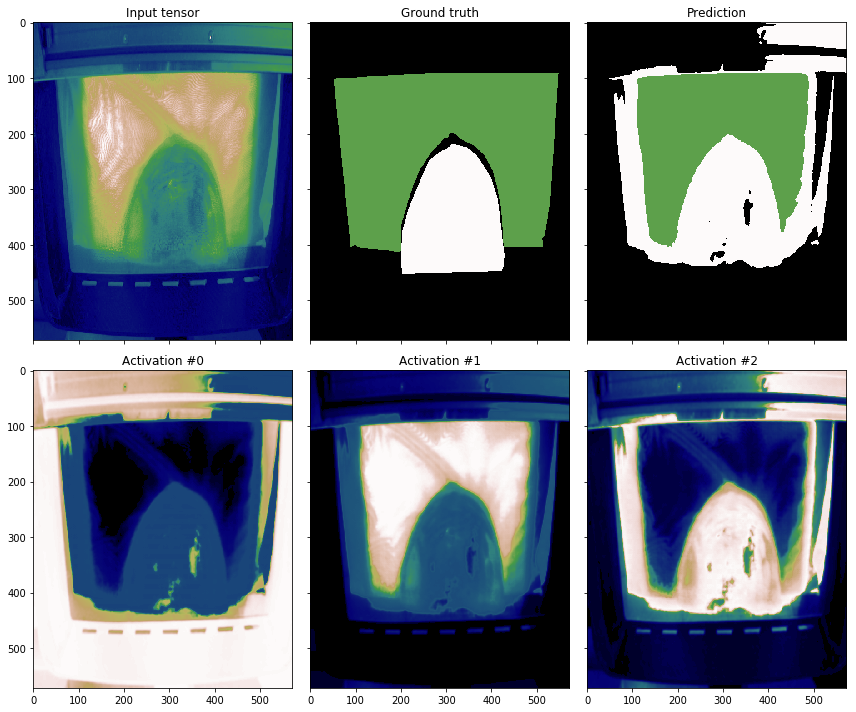

In [10]:
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 10))
ax[0,0].imshow(x_test[0, 44:-44, 44:-44, 0], aspect="auto")
pred = np.argmax(prediction, axis=3)
label_ = np.argmax(y_test, axis=3)
# segmentation res
ax[0,1].imshow(label_[0, 44:-44, 44:-44], aspect="auto")
ax[0,2].imshow(pred[0, :, :], aspect="auto")

# activation of separate class
ax[1,0].imshow(prediction[0, :, :, 0], aspect="auto")
ax[1,1].imshow(prediction[0, :, :, 1], aspect="auto")
ax[1,2].imshow(prediction[0, :, :, 2], aspect="auto")

ax[0,2].imshow(pred[0, :, :], aspect="auto")

# title
ax[0,0].set_title('Input tensor')
ax[0,1].set_title('Ground truth')
ax[0,2].set_title('Prediction')
ax[1,0].set_title('Activation #0')
ax[1,1].set_title('Activation #1')
ax[1,2].set_title('Activation #2')

fig.tight_layout()
plt.show()

In [18]:
print(prediction[0, :, :, 1])
print(np.min(prediction[0, :, :, 0]))
print(np.max(prediction[0, :, :, 0]))

print(np.min(prediction[0, :, :, 1]))
print(np.max(prediction[0, :, :, 1]))

print(np.min(prediction[0, :, :, 2]))
print(np.max(prediction[0, :, :, 2]))
print('')
print(prediction[0, 150, 250, 0])
print(prediction[0, 150, 250, 1])
print(prediction[0, 150, 250, 2])
print('')
print(prediction[0, 250, 150, 0])
print(prediction[0, 250, 150, 1])
print(prediction[0, 250, 150, 2])

[[0.01008501 0.01384646 0.01760416 ... 0.33506155 0.33452266 0.33487108]
 [0.00971865 0.01343947 0.01619639 ... 0.33333334 0.3390784  0.33333334]
 [0.00882725 0.01114963 0.01378712 ... 0.3378853  0.33751872 0.33850217]
 ...
 [0.00082445 0.00088157 0.00081869 ... 0.00070938 0.00066654 0.00071093]
 [0.00077982 0.00081107 0.00078181 ... 0.00065716 0.00063453 0.00066825]
 [0.00081374 0.00087488 0.00082843 ... 0.00070698 0.00065898 0.00070188]]
4.6885936e-05
0.9990049
0.0004976191
0.9999063
4.6885936e-05
0.33333334

0.008289145
0.9834216
0.008289145

0.0005304018
0.9989392
0.0005304018


In [10]:
print(np.amax(pred), np.amin(pred))
print(np.amax(label_), np.amin(label_))
print(label_.shape)

2 0
1 0
(1, 660, 660)


In [7]:
# Speed test
import time
x_test, y_test = generator_test_reallife(1)
t0 = time.time()
prediction = net_real.predict("./unet_trained/model.ckpt", x_test)
print('Time elapsed for single frame prediction: ', time.time()-t0, ' s')

INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-01-17 14:02:24,362 Restoring parameters from ./unet_trained/model.ckpt
2019-01-17 14:02:24,409 Model restored from file: ./unet_trained/model.ckpt


Time elapsed for single frame prediction:  0.3763997554779053  s


In [ ]:
''' 
Training using adam optimizer
'''

In [5]:
net = unet.Unet(channels=generator_reallife.channels,
                  n_class=generator_reallife.n_class,
                  layers=4,
                  features_root=16,
                  cost_kwargs=dict(
                      class_weights=[0.32, 0.46, 0.22]
                  ))

2019-01-21 11:31:47,508 Layers 4, features 16, filter size 3x3, pool size: 2x2


In [ ]:
trainer = unet.Trainer(net, optimizer="adam")
# train using adam optimizer
path = trainer.train(generator_reallife, "./unet_trained",
                     training_iters=32, epochs=100, display_step=8)

2019-01-21 11:31:51,189 Removing 'D:\ChangLiu\MasterThesis\Master-Thesis\prediction'
2019-01-21 11:31:51,189 Removing 'D:\ChangLiu\MasterThesis\Master-Thesis\unet_trained'
2019-01-21 11:31:51,189 Allocating 'D:\ChangLiu\MasterThesis\Master-Thesis\prediction'
2019-01-21 11:31:51,189 Allocating 'D:\ChangLiu\MasterThesis\Master-Thesis\unet_trained'
2019-01-21 11:31:58,829 Verification error= 48.9%, loss= 0.3853
2019-01-21 11:32:02,359 Start optimization
2019-01-21 11:32:09,498 Iter 0, Minibatch Loss= 0.3917, Training Accuracy= 0.6164, Minibatch error= 38.4%
2019-01-21 11:32:13,959 Iter 8, Minibatch Loss= 0.3125, Training Accuracy= 0.6181, Minibatch error= 38.2%
2019-01-21 11:32:18,361 Iter 16, Minibatch Loss= 0.2824, Training Accuracy= 0.4959, Minibatch error= 50.4%
2019-01-21 11:32:22,780 Iter 24, Minibatch Loss= 0.2436, Training Accuracy= 0.5194, Minibatch error= 48.1%
2019-01-21 11:32:26,421 Epoch 0, Average loss: 0.2897, learning rate: 0.0010
2019-01-21 11:32:27,094 Verification error

In [ ]:
x_test, y_test = generator_test_reallife(1)
prediction = net.predict("./unet_trained/model.ckpt", x_test)

In [ ]:
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 10))
ax[0,0].imshow(x_test[0, 44:-44, 44:-44, 0], aspect="auto")
pred = np.argmax(prediction, axis=3)
label_ = np.argmax(y_test, axis=3)
# segmentation res
ax[0,1].imshow(label_[0, 44:-44, 44:-44], aspect="auto")
ax[0,2].imshow(pred[0, :, :], aspect="auto")

# activation of separate class
ax[1,0].imshow(prediction[0, :, :, 0], aspect="auto")
ax[1,1].imshow(prediction[0, :, :, 1], aspect="auto")
ax[1,2].imshow(prediction[0, :, :, 2], aspect="auto")

ax[0,2].imshow(pred[0, :, :], aspect="auto")

# title
ax[0,0].set_title('Input tensor')
ax[0,1].set_title('Ground truth')
ax[0,2].set_title('Prediction')
ax[1,0].set_title('Activation #0')
ax[1,1].set_title('Activation #1')
ax[1,2].set_title('Activation #2')

fig.tight_layout()
plt.show()

In [ ]:
'''
Training with tricky custom data provider
'''

In [ ]:
custom_generator = 